In [19]:
from osgeo import gdal

(350, 350)


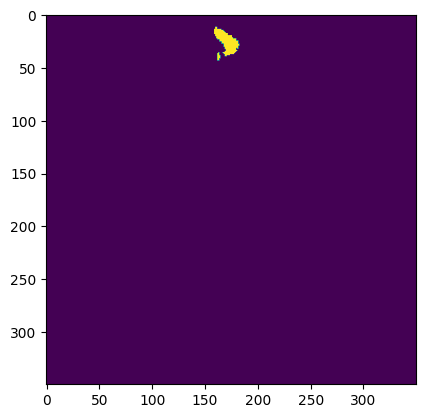

In [34]:

fp = r'/content/drive/MyDrive/KELP forest Satellite imagery Project Data/Train Features/train_labels.tar_l8u2RP0/train_kelp/AA498489_kelp.tif'
dataset = gdal.Open(fp, gdal.GA_ReadOnly)
# Note GetRasterBand() takes band no. starting from 1 not 0
band = dataset.GetRasterBand(1)
arr = band.ReadAsArray()
plt.imshow(arr)
print(arr.shape)

In [33]:
#https://geohackweek.github.io/raster/04-workingwithrasters/
#filepath = 'https://storage.googleapis.com/gcp-public-data-landsat/LC08/01/042/034/LC08_L1TP_042034_20170616_20170629_01_T1/LC08_L1TP_042034_20170616_20170629_01_T1_B4.TIF'
with rasterio.open(fp) as src:
    print(src.profile)

{'driver': 'GTiff', 'dtype': 'int8', 'nodata': None, 'width': 350, 'height': 350, 'count': 1, 'crs': None, 'transform': Affine(1.0, 0.0, 0.0,
       0.0, 1.0, 0.0), 'blockysize': 23, 'tiled': False, 'compress': 'lzw', 'interleave': 'band'}


/usr/local/lib/python3.10/dist-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


(350, 350)


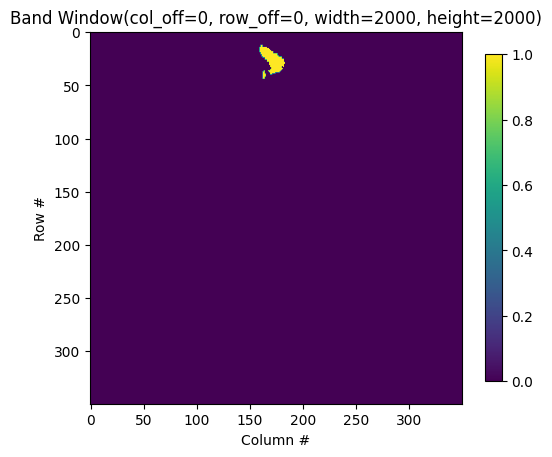

In [35]:
#https://rasterio.readthedocs.io/en/latest/topics/windowed-rw.html
#rasterio.windows.Window(col_off, row_off, width, height)
window = rasterio.windows.Window(0,0,2000,2000)

with rasterio.open(fp) as src:
    subset = src.read(1, window=window)    ### band 1

plt.figure(figsize=(6,8.5))
plt.imshow(subset)
plt.colorbar(shrink=0.5)
plt.title(f'Band {window}')
plt.xlabel('Column #')
plt.ylabel('Row #')
import numpy as np
data_array =  np.array(subset)
print(data_array.shape)

In [39]:
import os
path_training_data = '/content/drive/MyDrive/KELP forest Satellite imagery Project Data/Train Features/train_labels.tar_l8u2RP0/train_kelp'
list_of_all_training_tiff_images =os.listdir(path_training_data)

In [40]:
len(list_of_all_training_tiff_images)    #### Training size data

5635